In [12]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from probability import *
from aaa_algorithms import *
from spectral_transforms import *
from numerical import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

### Fit kernel $K$ as sum of exponentials and then invert to find $J$

AAA failed to converge within 10 iterations.


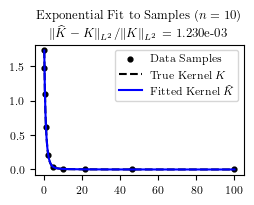

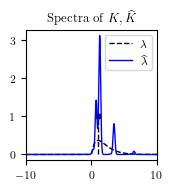

no roots to left or right


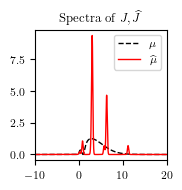

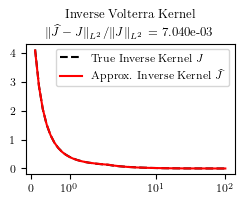

In [34]:
# Define the CM Volterra kernel
n = 10
t = np.linspace(0, 100, 1000)[1:]
t_samples = np.logspace(-1, 2, n)
K = lambda t: 1/(t + 1)**2 + np.exp(-t)# + np.log(1 + 1/(t+1))
K_data = K(t_samples)

# Define its analytical spectral distribution lambda
density = lambda x: (x > 0) * x*np.exp(-x)# + np.exp(-x)*(1 - np.exp(-x))/x
atoms = np.array([1])
atom_wts = np.array([1])
quad_pts, quad_wts = trap_quad(-100, 100, int(1e5))
lmbda = Distribution(density, atoms, atom_wts, quad_pts, quad_wts)

# Fit the Volterra kernel and obtain an approximate spectral distribution lambda_hat
lmbda_a, lmbda_b = fit_exp_sum(K(t_samples), t_samples, n, init="aaa", opt_iter=1000)
lmbda_hat = Distribution(None, lmbda_a, lmbda_b, quad_pts, quad_wts)

K_hat = exp_kernel(lmbda_hat, t)

rel_err = np.linalg.norm(K(t) - K_hat)/np.linalg.norm(K(t))

# Plot K and K_hat
fig, ax = plt.subplots(figsize=(2.7, 1.7))
str = r"$\|\widehat{K} - K\|_{L^2}/\|K\|_{L^2}$" + f" = {rel_err:.3e}"
ax.set_title("Exponential Fit to Samples " + f"$(n = {n})$\n" + str, size=9)
ax.scatter(t_samples, K_data, color="k", s=12)
ax.plot(t, K(t), color="k", linestyle="--")
ax.plot(t, K_hat, color="blue")
#ax.set_xscale("symlog")
ax.legend(["Data Samples", "True Kernel $K$", "Fitted Kernel $\widehat{K}$"])
plt.savefig(f"figures/cm_data_inversion_K_n={n}.pdf", bbox_inches='tight')
plt.show()

# Plot lambda and lambda_hat
fig, ax = plt.subplots(figsize=(1.7, 1.7))
ax.set_title("Spectra of $K, \widehat{K}$", size=9)
if lmbda.density is not None:
    ax.plot(lmbda.quad_pts, lmbda.density_vals, color="k", linewidth=1, linestyle="--", label="$\lambda$")
ax.scatter(lmbda.atoms, lmbda.atom_wts, marker='o', color="k", s=12)
ax.vlines(lmbda.atoms, ymin=0, ymax=lmbda.atom_wts, color="k", linewidth=1, linestyle="--")

density_hat = scipy.stats.gaussian_kde(lmbda_hat.atoms, weights=lmbda_hat.atom_wts, bw_method=0.1)
ax.plot(lmbda_hat.quad_pts, np.sum(lmbda_hat.atom_wts)*density_hat(lmbda_hat.quad_pts), color="blue", linewidth=1, label="$\widehat{\lambda}$")
ax.legend(loc="upper right")
#ax.set_xscale("symlog")
#ax.set_yscale("log")
ax.set_xlim(-10, 10)
plt.savefig(f"figures/cm_sample_lmbda_hat_n={n}.pdf", bbox_inches='tight')
plt.show()

# Use the spectral inversion map B to compute the inverse spectra mu and mu_hat from lambda and lambda_hat
c0 = 0
c1 = 0
mu, zeta0, zeta1 = B_real(lmbda, c0, c1)
mu_hat, zeta0_hat, zeta1_hat = B_real(lmbda_hat, c0, c1)

# Plot mu and mu_hat
fig, ax = plt.subplots(figsize=(1.7, 1.7))
ax.set_title("Spectra of $J, \widehat{J}$", size=9)
if mu.density is not None:
    ax.plot(mu.quad_pts, mu.density_vals, color="k", linewidth=1, linestyle="--", label="$\mu$")
ax.scatter(mu.atoms, mu.atom_wts, marker='o', color="k", s=12)
ax.vlines(mu.atoms, ymin=0, ymax=mu.atom_wts, color="k", linewidth=1, linestyle="--")

density_hat = scipy.stats.gaussian_kde(mu_hat.atoms, weights=mu_hat.atom_wts, bw_method=0.05)
ax.plot(mu_hat.quad_pts, np.sum(mu_hat.atom_wts)*density_hat(lmbda_hat.quad_pts), color="red", linewidth=1, label="$\widehat{\mu}$")
ax.legend(loc="upper right")
#ax.set_xscale("symlog")
#ax.set_yscale("log")
ax.set_xlim(-10, 20)
plt.savefig(f"figures/cm_sample_mu_hat_n={n}.pdf", bbox_inches='tight')
plt.show()

# Compute the analytical inverse kernel J corresponding to K, lambda and the approximate inverse kernel J_hat corresponding to K_hat, lambda_hat
J = exp_kernel(mu, t)
J_hat = exp_kernel(mu_hat, t)

rel_err = np.linalg.norm(J - J_hat)/np.linalg.norm(J)

fig, ax = plt.subplots(figsize=(2.7, 1.7))
str = r"$\|\widehat{J} - J\|_{L^2}/\|J\|_{L^2}$" + f" = {rel_err:.3e}"
ax.set_title("Inverse Volterra Kernel\n" + str, size=9)
ax.plot(t, J, color="k", linestyle="--")
ax.plot(t, J_hat, color="red")
ax.legend(["True Inverse Kernel $J$", "Approx. Inverse Kernel $\widehat{J}$"])
ax.set_xscale("symlog")
plt.savefig(f"figures/cm_data_inversion_J_n={n}.pdf", bbox_inches='tight')
plt.show()

### Fit kernel $K$ as sum of cosines and then invert to find $J$

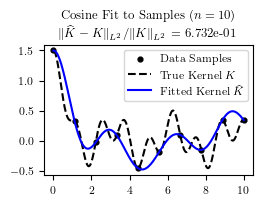

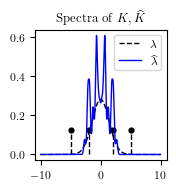

left and right roots found


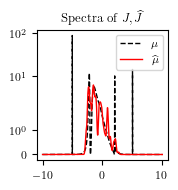

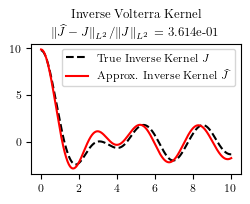

In [36]:
# Define the PD Volterra kernel
n = 10
t = np.linspace(0, 10, 1000)
t_samples = np.linspace(0, 10, n)
K = lambda t: np.exp(-t**2) + 1/4*np.cos(2*t) + 1/4*np.cos(5*t)
K_data = K(t_samples)

# Define its analytical spectral distribution lambda
density = lambda x: np.exp(-x**2/4)/(2*np.sqrt(math.pi))
atoms = np.array([-5, -2, 2, 5])
atom_wts = np.array([1, 1, 1, 1])/8
quad_pts, quad_wts = trap_quad(-10, 10, int(1e5))
lmbda = Distribution(density, atoms, atom_wts, quad_pts, quad_wts, full_support=True)

# Fit the Volterra kernel and obtain an approximate spectral distribution lambda_hat
lmbda_a, lmbda_b = fit_cos_sum(K(t_samples), t_samples, n, init="dct", opt_iter=1000)
lmbda_a, lmbda_b = symmetrize_dist(lmbda_a, lmbda_b, halve_center=False)
assert(np.linalg.norm(lmbda_a + np.flip(lmbda_a)) < 1e-10)
assert(np.linalg.norm(lmbda_b - np.flip(lmbda_b)) < 1e-10)
lmbda_hat = Distribution(None, lmbda_a, lmbda_b, quad_pts, quad_wts)

K_hat = complex_exp_kernel(lmbda_hat, t)

rel_err = np.linalg.norm(K(t) - K_hat)/np.linalg.norm(K(t))

# Plot K and K_hat
fig, ax = plt.subplots(figsize=(2.7, 1.7))
str = r"$\|\widehat{K} - K\|_{L^2}/\|K\|_{L^2}$" + f" = {rel_err:.3e}"
ax.set_title("Cosine Fit to Samples " + f"$(n = {n})$\n" + str, size=9)
ax.scatter(t_samples, K_data, color="k", s=12)
ax.plot(t, K(t), color="k", linestyle="--")
ax.plot(t, K_hat, color="blue")
ax.legend(["Data Samples", "True Kernel $K$", "Fitted Kernel $\widehat{K}$"])
plt.savefig(f"figures/pd_data_inversion_K_n={n}.pdf", bbox_inches='tight')
plt.show()

# Plot lambda and lambda_hat
fig, ax = plt.subplots(figsize=(1.7, 1.7))
ax.set_title("Spectra of $K, \widehat{K}$", size=9)
if lmbda.density is not None:
    ax.plot(lmbda.quad_pts, lmbda.density_vals, color="k", linewidth=1, linestyle="--", label="$\lambda$")
ax.scatter(lmbda.atoms, lmbda.atom_wts, marker='o', color="k", s=12)
ax.vlines(lmbda.atoms, ymin=0, ymax=lmbda.atom_wts, color="k", linewidth=1, linestyle="--")

density_hat = scipy.stats.gaussian_kde(lmbda_hat.atoms, weights=lmbda_hat.atom_wts, bw_method=0.1)
ax.plot(lmbda_hat.quad_pts, np.sum(lmbda_hat.atom_wts)*density_hat(lmbda_hat.quad_pts), color="blue", linewidth=1, label="$\widehat{\lambda}$")
ax.legend(loc="upper right")
plt.savefig(f"figures/pd_sample_lmbda_hat_n={n}.pdf", bbox_inches='tight')
plt.show()

# Use the spectral inversion map B to compute the inverse spectra mu and mu_hat from lambda and lambda_hat
c0 = 1
c1 = 1
mu, zeta0, zeta1 = B_real(lmbda, c0, c1)
mu_hat, zeta0_hat, zeta1_hat = B_real(lmbda_hat, c0, c1)

# Plot mu and mu_hat
fig, ax = plt.subplots(figsize=(1.7, 1.7))
ax.set_title("Spectra of $J, \widehat{J}$", size=9)
if mu.density is not None:
    ax.plot(mu.quad_pts, mu.density_vals, color="k", linewidth=1, linestyle="--", label="$\mu$")
ax.scatter(mu.atoms, mu.atom_wts, marker='o', color="k", s=12)
ax.vlines(mu.atoms, ymin=0, ymax=mu.atom_wts, color="k", linewidth=1, linestyle="--")

density_hat = scipy.stats.gaussian_kde(mu_hat.atoms, weights=mu_hat.atom_wts, bw_method=0.1)
ax.plot(mu_hat.quad_pts, np.sum(mu_hat.atom_wts)*density_hat(lmbda_hat.quad_pts), color="red", linewidth=1, label="$\widehat{\mu}$")
ax.legend(loc="upper right")
ax.set_yscale("symlog")
plt.savefig(f"figures/pd_sample_mu_hat_n={n}.pdf", bbox_inches='tight')
plt.show()

# Compute the analytical inverse kernel J corresponding to K, lambda and the approximate inverse kernel J_hat corresponding to K_hat, lambda_hat
J = complex_exp_kernel(mu, t)
J_hat = complex_exp_kernel(mu_hat, t)

rel_err = np.linalg.norm(J - J_hat)/np.linalg.norm(J)

fig, ax = plt.subplots(figsize=(2.7, 1.7))
str = r"$\|\widehat{J} - J\|_{L^2}/\|J\|_{L^2}$" + f" = {rel_err:.3e}"
ax.set_title("Inverse Volterra Kernel\n" + str, size=9)
ax.plot(t, J, color="k", linestyle="--")
ax.plot(t, J_hat, color="red")
ax.legend(["True Inverse Kernel $J$", "Approx. Inverse Kernel $\widehat{J}$"])
plt.savefig(f"figures/pd_data_inversion_J_n={n}.pdf", bbox_inches='tight')
plt.show()

In [13]:
lmbda_thresh = remove_small_masses(lmbda_hat, 1e-15)

In [12]:
lmbda_thresh.zero_sets

array([[         -inf, -313.68818354],
       [-313.68818354, -312.74664822],
       [-312.74664822, -311.17742269],
       ...,
       [ 311.17742269,  312.74664822],
       [ 312.74664822,  313.68818354],
       [ 313.68818354,           inf]])

In [10]:
lmbda_thresh.num_atoms

72

In [20]:
t = np.linspace(0, 1, 100)
K = np.exp(-1j*t)
dt = t[1] - t[0]
n = len(t)
omegas = -np.fft.fftfreq(n, d=dt/(2*math.pi))
betas = (1/n)*np.fft.fft(K, norm=None)
betas = np.real(betas)
betas[betas < 0] = 0

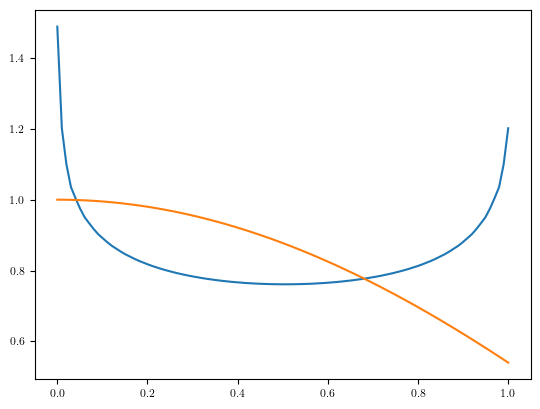

In [29]:
plt.plot(t, np.exp(-1j*omegas*t[:, None]) @ betas)
plt.plot(t, K)
plt.show()

In [30]:
omegas, betas = fit_complex_exp_sum(K, t, len(omegas), init="dft", omega_init_min=None, omega_init_max=None, omega_min=1, omega_max=1, opt_iter=1000, lr=1e-1)

/Users/georgestepaniants/Research/time-deconvolution/spectral_transforms.py:306: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/aten/src/ATen/native/Copy.cpp:239.)
  x_torch = torch.DoubleTensor(x)


In [40]:
t = np.linspace(0, 10, 1000)
t = t[1:]
K = 1/(t + 1)**2 + np.exp(-t) + np.log(1 + 1/t)

100


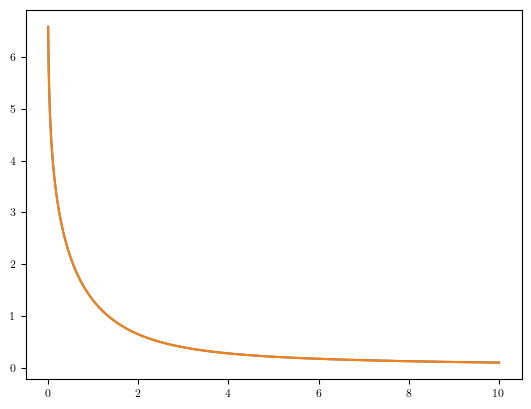

0.000887818008562027


In [42]:
omegas, betas = fit_exp_sum(K, t, 100, init="aaa", opt_iter=0, lr=1e-2)
print(len(omegas))
K_hat = np.exp(-t[:, None]*omegas) @ betas

plt.plot(t, K)
plt.plot(t, K_hat)
plt.show()

print(np.linalg.norm(K_hat - K)/np.linalg.norm(K))

In [69]:
np.sum(betas > 0)

9

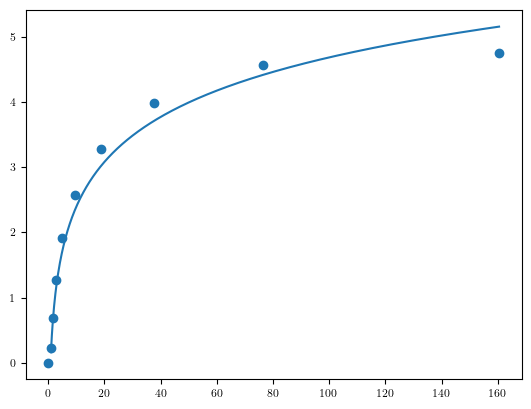

In [ ]:
plt.scatter(omegas, np.cumsum(betas))

z = np.linspace(1, max(omegas), 1000)
F = np.cumsum(1/z) * (z[1] - z[0])
plt.plot(z, F)
plt.show()

In [32]:
omegas

array([0.        , 0.11795794, 2.0583623 , 4.9299663 ])

In [33]:
betas

array([0.        , 0.        , 0.33618257, 0.12707079])

In [ ]:
s = np.logspace(0, 2, 1000)
_, pol, res = aaa_exp_sum(K, t, s, aaa_iters=100, real_symm=True, max_exp=0.5)

/Users/georgestepaniants/Research/time-deconvolution/aaa_algorithms.py:171: RuntimeWarning: invalid value encountered in multiply
  y = np.exp(x) * scipy.special.exp1(x)


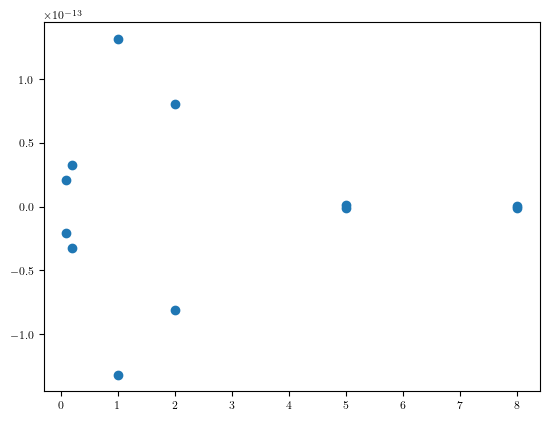

In [62]:
plt.scatter(np.real(pol), np.imag(pol))
plt.show()

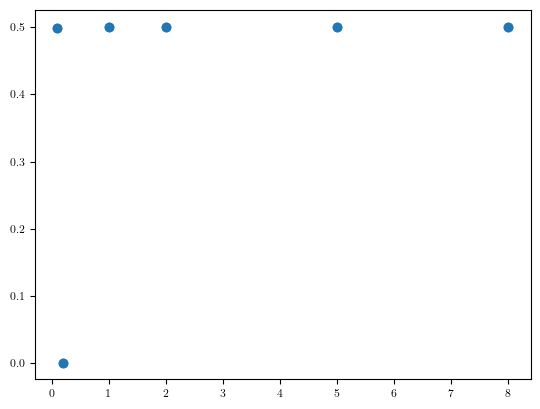

In [ ]:
assert(np.all(np.abs(np.imag(pol)) < 1e-10))
assert(np.all(np.abs(np.imag(res)) < 1e-10))
omegas = np.real(pol)
betas = np.real(res)

plt.scatter(omegas, betas)
plt.show()

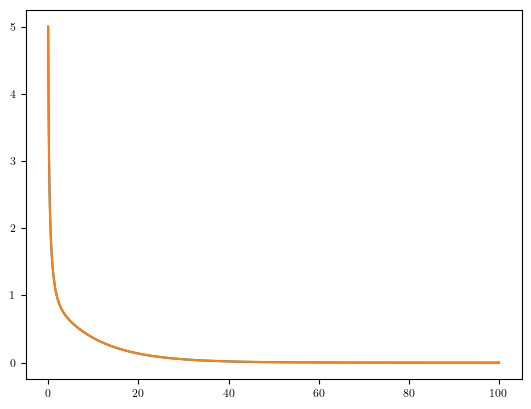

8.871474078541632e-05


In [ ]:
K_hat = np.exp(-t[:, None]*omegas) @ betas

plt.plot(t, K_hat)
plt.plot(t, K)
plt.show()

print(np.linalg.norm(K_hat - K)/np.linalg.norm(K))